# Model Evaluation
<img src='https://images.unsplash.com/photo-1585790812444-fdb3edec78cc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8ZmFzaGlvbiUyMHNob3dzfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=800&q=60'>

## 어떤 모델이 좋은 모델인가?
<img src='https://i.pinimg.com/564x/79/0d/3f/790d3fdba318b73adecb78010c98f566.jpg'>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,625 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

In [25]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [ ]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

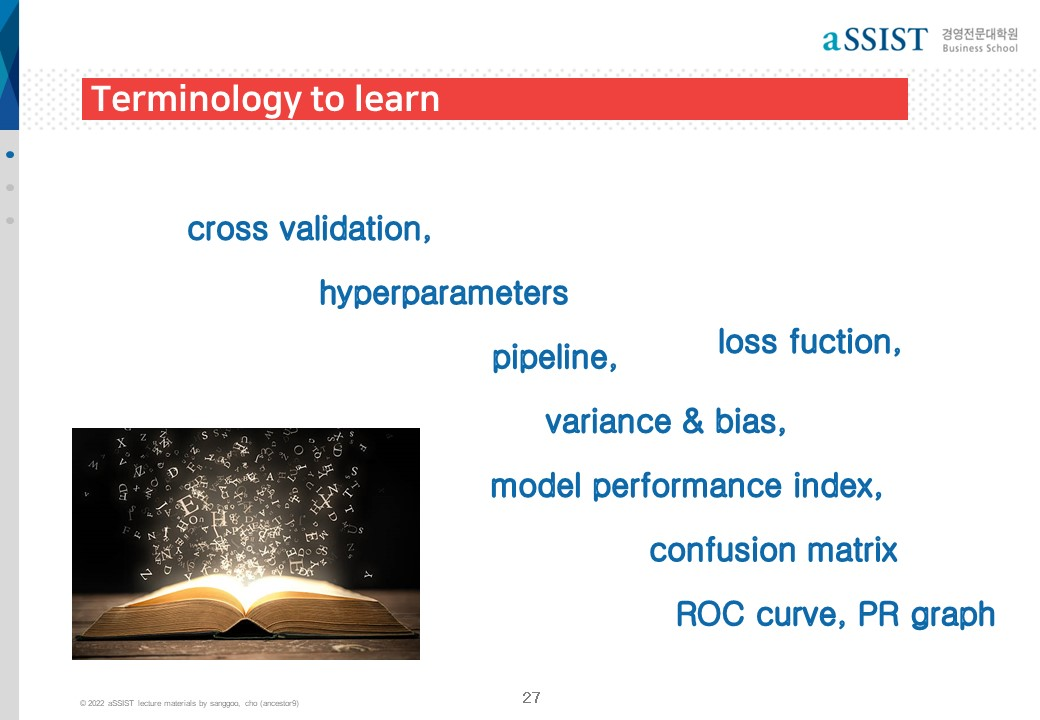

In [ ]:
Image(filename=dir_path + '/슬라이드27.jpg', width=width, height=height)

## Confusion matrix with recall & precision
### Are all mushrooms edible when you get lost in forest?
<img src='https://miro.medium.com/max/700/1*7CCWpEdtFk_rV4xc33w83w.jpeg'>

In [ ]:
y_true = ['pos', 'pos','pos','pos','pos','pos','pos','pos','pos','pos','pos','pos',
         'neg', 'neg','neg','neg','neg','neg','neg','neg','neg','neg']
y_pred = ['pos', 'pos','pos','pos','pos','neg','neg','neg','neg','neg','neg','neg',
         'neg', 'neg','neg','neg','neg','neg','neg','pos','pos','pos']

     |████████████████████████████████| 540 kB 17.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=94766706b8f25e3624d15fe1069ce0931cac78987a23180feeeeb0c72b2c6868
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


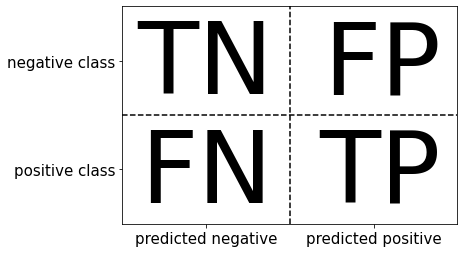

In [ ]:
! pip install mglearn
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[7, 3],
       [7, 5]])

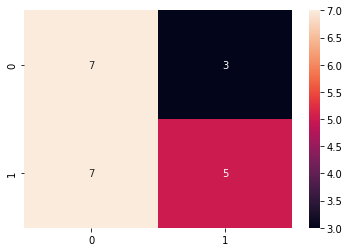

In [ ]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

<img src='https://miro.medium.com/max/700/1*xQwN9XrsrGtMW3s6BfAdTg.jpeg'>

<img src='https://johngrib.github.io/resource/wiki/two-type-error/pregnant.jpeg'>

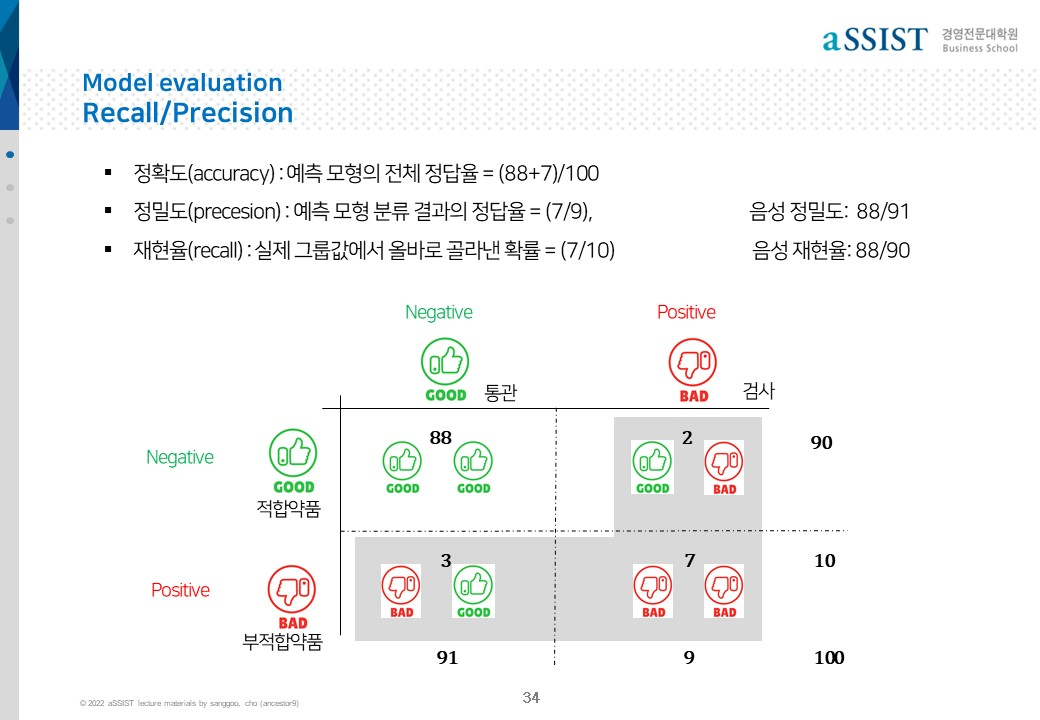

In [ ]:
Image(filename=dir_path + '/슬라이드34.jpg', width=width, height=height)

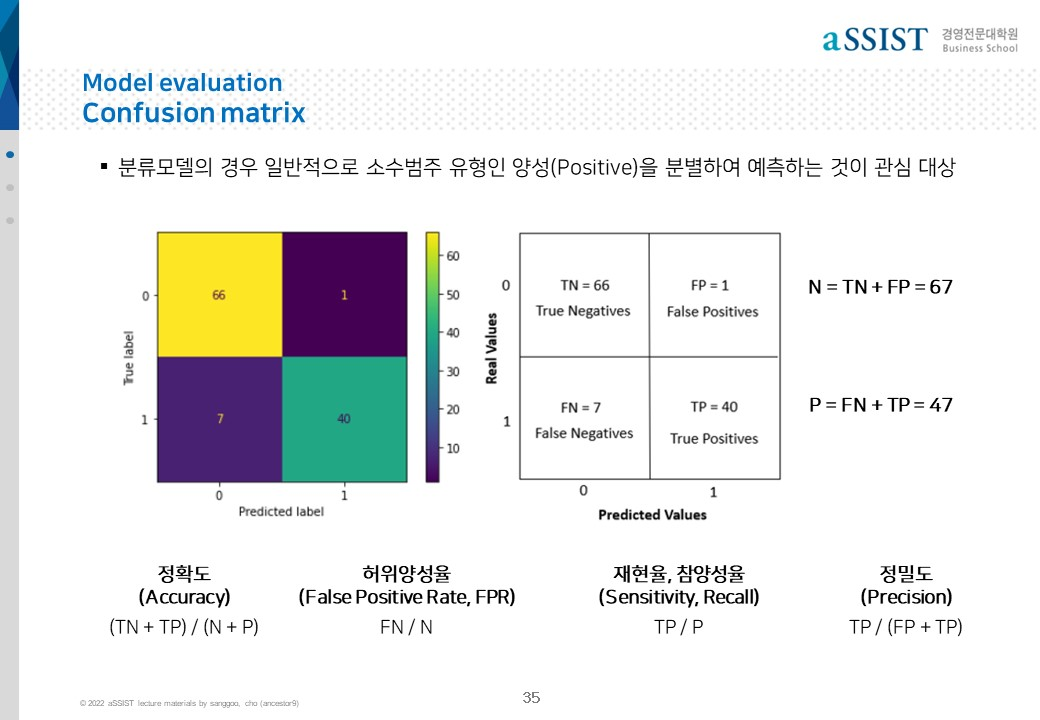

In [ ]:
Image(filename=dir_path + '/슬라이드35.jpg', width=width, height=height)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(7, 3, 7, 5)

https://en.wikipedia.org/wiki/Precision_and_recall
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=300 height=500>

<img src='https://miro.medium.com/max/700/1*ztg9giC_itCaQ52fz61d3A.gif' width=800 height=500>

<img src='https://www.msdmanuals.com/-/media/manual/professional/images/s/p/s/sps_distributions_test_results.gif?mw=704&amp;thn=0&amp;sc_lang=en'>

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0(negative)', 'class 1(positive)']
print(classification_report(y_true, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

class 0(negative)       0.50      0.70      0.58        10
class 1(positive)       0.62      0.42      0.50        12

         accuracy                           0.55        22
        macro avg       0.56      0.56      0.54        22
     weighted avg       0.57      0.55      0.54        22



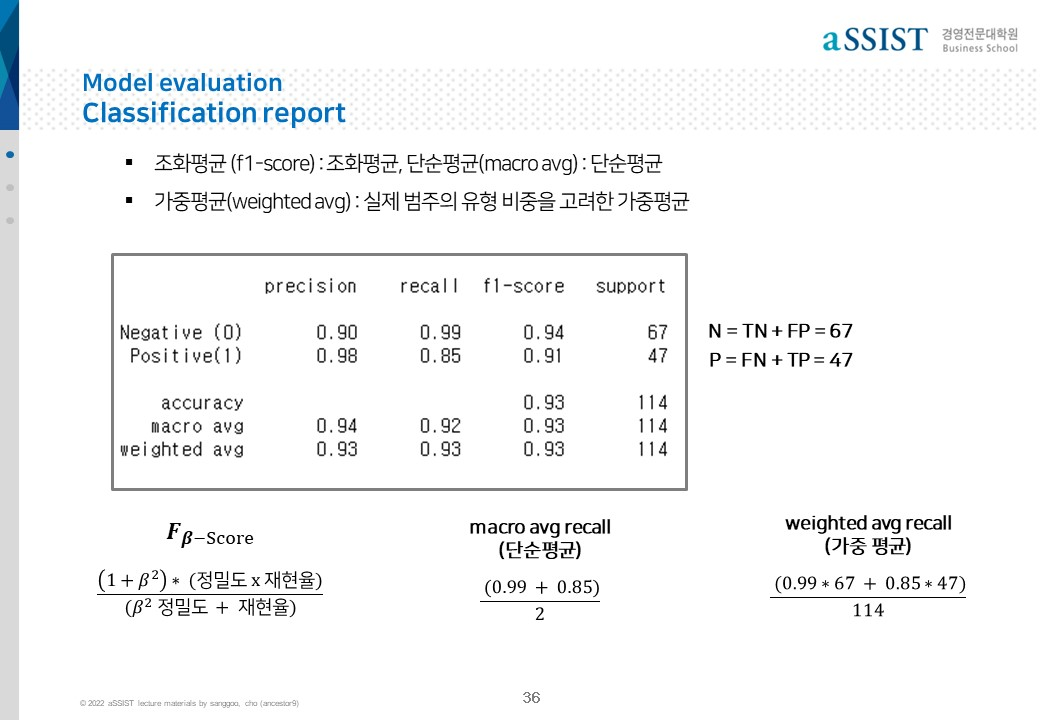

In [ ]:
Image(filename=dir_path + '/슬라이드36.jpg', width=width, height=height)

## Import the dataset Wisconsin breast cancer dataset from skelarn.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
cancer.shape
cancer.head()
cancer.target.value_counts(normalize=True) #cancer.target.value_counts().plot(kind='bar', rot='360')

0    0.627417
1    0.372583
Name: target, dtype: float64

#### 층화 추출

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [28]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
clf = SVC(random_state=0, probability=True)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=0)

## confusion_matrix

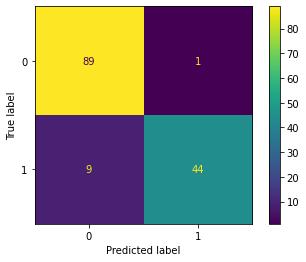

In [29]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

array([[89,  1],
       [ 9, 44]])

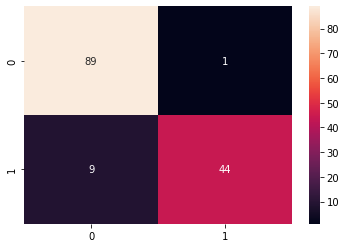

In [30]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d")

### manual calculation

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[89,  1],
       [ 9, 44]])

In [33]:
print(f'정확도(accuracy): {(cm * np.eye(2)).sum() / cm.sum():.3f}')
print(f'정밀도(precision): {((cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)).round(3)}')
precision = (cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)
print(f'검측율(recall): {((cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)).round(3)}')
recall = (cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)
print(f'f1-score(Harmonic mean): {((2 / (1 / precision + 1 / recall))).round(3)}')

정확도(accuracy): 0.930
정밀도(precision): [0.908 0.978]
검측율(recall): [0.989 0.83 ]
f1-score(Harmonic mean): [0.947 0.898]


In [34]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)
print('\n')
metrics.precision_score(y_test, y_pred)
print('\n')
metrics.recall_score(y_test, y_pred)
print('\n')
metrics.f1_score(y_test, y_pred)

0.9300699300699301

0.9777777777777777

0.8301886792452831

0.8979591836734695

### classification_report

In [35]:
from sklearn.metrics import classification_report
target_names = ['생존(0)', '사망(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       생존(0)       0.91      0.99      0.95        90
       사망(1)       0.98      0.83      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



### 예측 모형의 성능지표 이해하기

- **허위** 음성과 **허위** 양성은 **잘못** 분류
- **실제** 음성과 **실제** 양성은 **올바로** 분류
- **정확도**는 올바로 분류된 비율

> $\frac{\text{true samples}}{\text{total samples}}$

- **정밀도**는 올바르게 분류된 **예측** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false positives}}$

- **재현율**은 올바르게 분류된 **실제** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false negatives}}$

### ROC(Receiver Operating Characteristic Curve) & AUROC(Area Under the Receiver Operating Characteristic Curve)

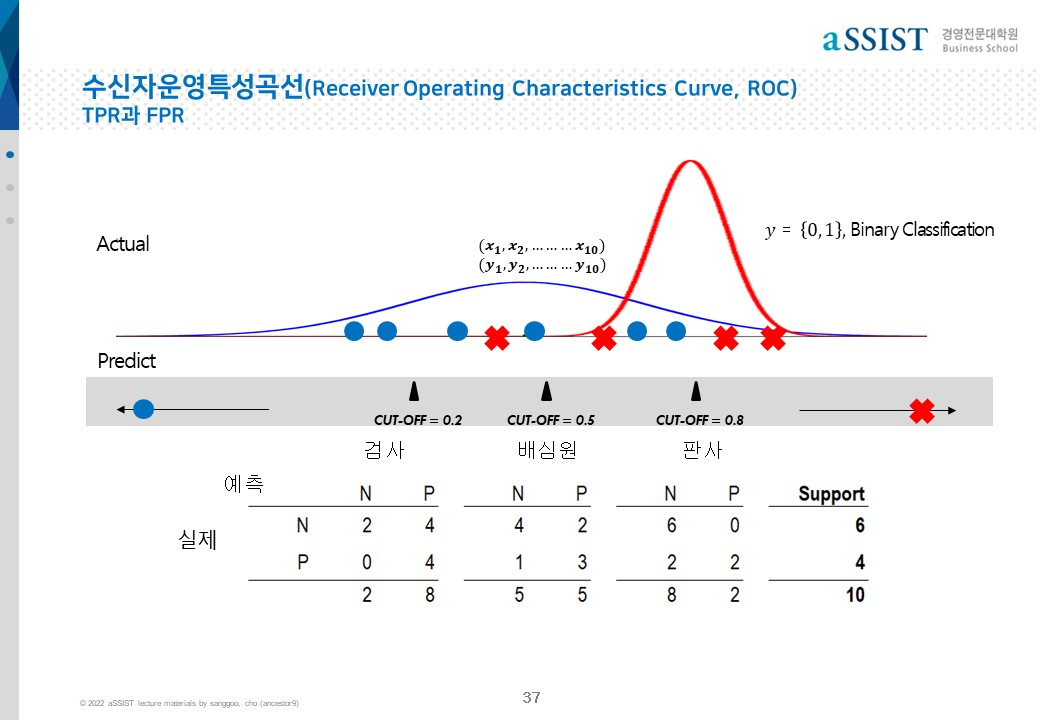

In [ ]:
Image(filename=dir_path + '/슬라이드37.jpg', width=width, height=height)

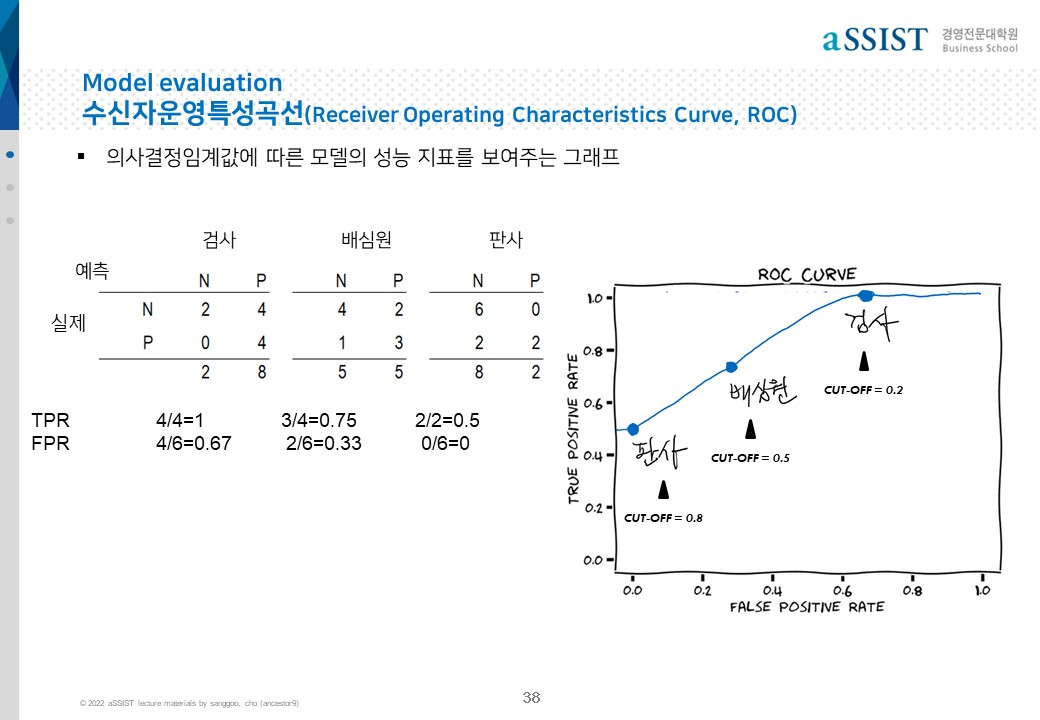

In [ ]:
Image(filename=dir_path + '/슬라이드38.jpg', width=width, height=height)

## Cutt-off value에 따른 혼동표의 변화, 분류판단의 변화

In [36]:
y_proba= clf.predict_proba(X_test)
data = pd.DataFrame(y_proba, columns =['음성분류_확률', '양성분류_확률']).round(2)
data['분류판정(y_pred)'] = y_pred
data.sample(10)

,음성분류_확률,양성분류_확률,분류판정(y_pred)
69,0.98,0.02,0
31,0.02,0.98,1
24,0.86,0.14,0
25,0.98,0.02,0
71,0.00,1.00,1
138,0.55,0.45,0
135,0.92,0.08,0
139,0.91,0.09,0
21,0.13,0.87,1
2,0.86,0.14,0


In [37]:
data[data['분류판정(y_pred)'] == 1]['양성분류_확률'].sort_values().head()
data[data['분류판정(y_pred)'] == 0].sort_values(by='음성분류_확률', ascending=False).head()

20     0.71
9      0.74
120    0.85
21     0.87
104    0.91
Name: 양성분류_확률, dtype: float64

,음성분류_확률,양성분류_확률,분류판정(y_pred)
48,0.99,0.01,0
69,0.98,0.02,0
84,0.98,0.02,0
106,0.98,0.02,0
38,0.98,0.02,0




              precision    recall  f1-score   support

       생존(0)       0.91      0.99      0.95        90
       사망(1)       0.98      0.83      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



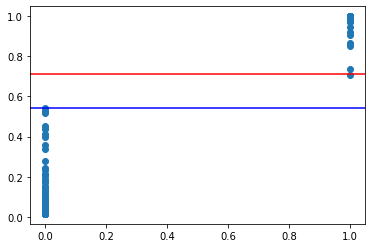

In [38]:
plt.scatter(y_pred, y_proba[:, 1])
print('\n')
print(classification_report(y_test, y_pred, target_names=target_names))
plt.axhline(y=data[data['분류판정(y_pred)'] == 1]['양성분류_확률'].min(), color='r', linestyle='-')
plt.axhline(y=data[data['분류판정(y_pred)'] == 0]['양성분류_확률'].max(), color='b', linestyle='-')



              precision    recall  f1-score   support

       생존(0)       0.96      0.86      0.91        90
       사망(1)       0.79      0.94      0.86        53

    accuracy                           0.89       143
   macro avg       0.88      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143



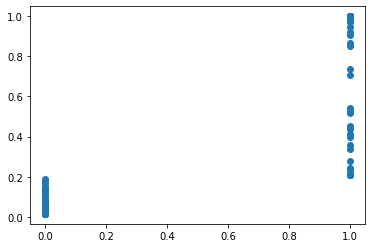

In [39]:
y_pred_police = y_proba[:, 1] > 0.2
plt.scatter(y_pred_police, y_proba[:, 1])
print('\n')
print(classification_report(y_test, y_pred_police, target_names=target_names))



              precision    recall  f1-score   support

       생존(0)       0.89      0.99      0.94        90
       사망(1)       0.98      0.79      0.88        53

    accuracy                           0.92       143
   macro avg       0.93      0.89      0.91       143
weighted avg       0.92      0.92      0.91       143



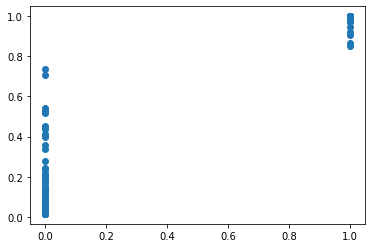

In [40]:
y_pred_judge = y_proba[:, 1] > 0.8
plt.scatter(y_pred_judge, y_proba[:, 1])
print('\n')
print(classification_report(y_test, y_pred_judge, target_names=target_names))

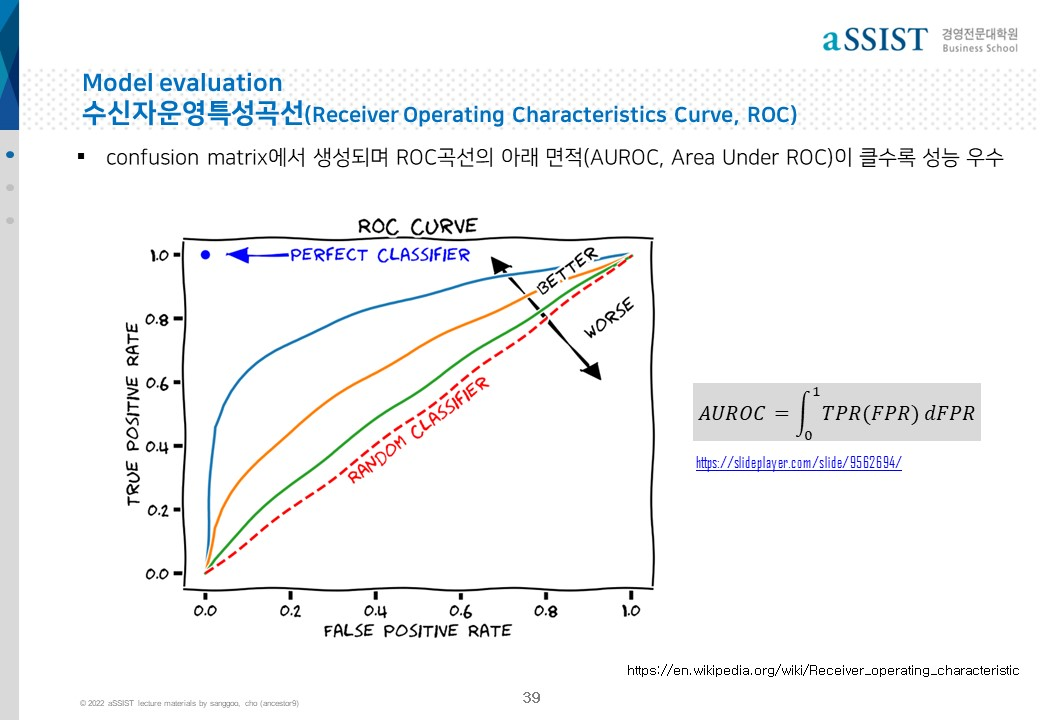

In [ ]:
Image(filename=dir_path + '/슬라이드39.jpg', width=width, height=height)

### Threshold에 따른 ROC커브위의 위치 변화
<img src = 'https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic6.gif'>

### 두 그룹을 잘 구분할수록 AUROC의 크기가 커짐
<img src = 'https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic7.gif'>

In [41]:
y_proba= clf.predict_proba(X_test)
data = pd.DataFrame(y_proba, columns =['음성분류_확률', '양성분류_확률']).round(2)
data['분류판정(y_pred)'] = y_pred
data.sample(10)

,음성분류_확률,양성분류_확률,분류판정(y_pred)
114,0.96,0.04,0
61,0.01,0.99,1
54,0.76,0.24,0
77,0.01,0.99,1
110,0.01,0.99,1
87,0.56,0.44,0
84,0.98,0.02,0
8,0.97,0.03,0
58,0.98,0.02,0
69,0.98,0.02,0


(array([71., 12.,  4.,  3.,  5.,  3.,  0.,  2.,  2., 41.]),
 array([0.01433061, 0.11289752, 0.21146444, 0.31003135, 0.40859827,
        0.50716518, 0.6057321 , 0.70429901, 0.80286593, 0.90143284,
        0.99999976]),
 <a list of 10 Patch objects>)

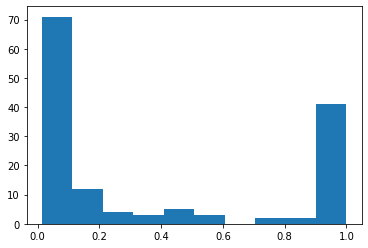

In [42]:
plt.hist(y_proba[:, 1])

(array([41.,  2.,  2.,  0.,  3.,  5.,  3.,  4., 12., 71.]),
 array([2.41069095e-07, 9.85671563e-02, 1.97134072e-01, 2.95700987e-01,
        3.94267902e-01, 4.92834817e-01, 5.91401733e-01, 6.89968648e-01,
        7.88535563e-01, 8.87102478e-01, 9.85669394e-01]),
 <a list of 10 Patch objects>)

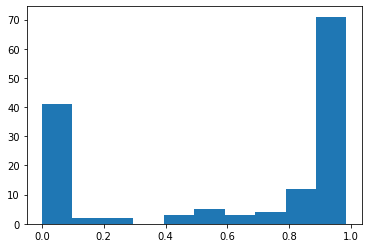

In [43]:
plt.hist(y_proba[:, 0])

(array([71., 12.,  4.,  3.,  5.,  3.,  0.,  2.,  2., 41.]),
 array([0.01433061, 0.11289752, 0.21146444, 0.31003135, 0.40859827,
        0.50716518, 0.6057321 , 0.70429901, 0.80286593, 0.90143284,
        0.99999976]),
 <a list of 10 Patch objects>)

(array([41.,  2.,  2.,  0.,  3.,  5.,  3.,  4., 12., 71.]),
 array([2.41069095e-07, 9.85671563e-02, 1.97134072e-01, 2.95700987e-01,
        3.94267902e-01, 4.92834817e-01, 5.91401733e-01, 6.89968648e-01,
        7.88535563e-01, 8.87102478e-01, 9.85669394e-01]),
 <a list of 10 Patch objects>)

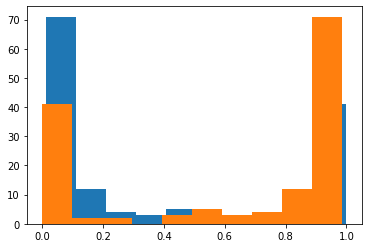

In [44]:
plt.hist(y_proba[:, 1])
plt.hist(y_proba[:, 0])

In [45]:
from sklearn.dummy import DummyClassifier 
dummy_clf = DummyClassifier(strategy='uniform', random_state=11) 
dummy_clf.fit(X_train, y_train) 
dummy_clf.score(X_test, y_test)

DummyClassifier(random_state=11, strategy='uniform')

0.5244755244755245

(array([  0.,   0.,   0.,   0.,   0., 143.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

(array([71., 12.,  4.,  3.,  5.,  3.,  0.,  2.,  2., 41.]),
 array([0.01433061, 0.11289752, 0.21146444, 0.31003135, 0.40859827,
        0.50716518, 0.6057321 , 0.70429901, 0.80286593, 0.90143284,
        0.99999976]),
 <a list of 10 Patch objects>)

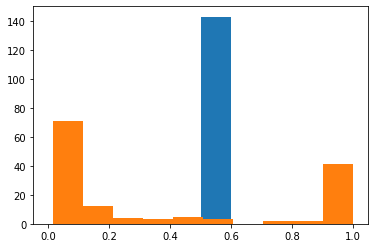

In [46]:
dummy_proba = dummy_clf. predict_proba(X_test) 
plt.hist(dummy_proba[:, 1]) 
plt.hist(y_proba[:, 1]) 

array([0.        , 0.        , 0.        , 0.01111111, 0.01111111,
       0.03333333, 0.03333333, 0.06666667, 0.06666667, 0.1       ,
       0.1       , 0.15555556, 0.15555556, 0.24444444, 0.24444444,
       0.32222222, 0.32222222, 1.        ])

array([0.        , 0.01886792, 0.77358491, 0.77358491, 0.83018868,
       0.83018868, 0.8490566 , 0.8490566 , 0.90566038, 0.90566038,
       0.94339623, 0.94339623, 0.96226415, 0.96226415, 0.98113208,
       0.98113208, 1.        , 1.        ])

array([1.99999976, 0.99999976, 0.90653478, 0.86831108, 0.70706534,
       0.52812776, 0.51802891, 0.44464995, 0.39565185, 0.28067254,
       0.23489924, 0.18942907, 0.174262  , 0.10622661, 0.09568538,
       0.07497776, 0.06412235, 0.01433061])

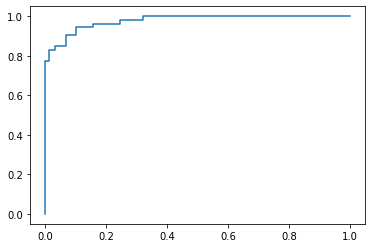

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:, 1])
fpr
print('\n')
tpr
print('\n')
thresholds
print('\n')
plt.plot(fpr, tpr)

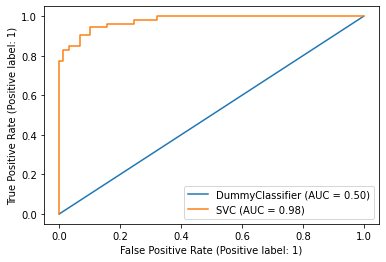

In [ ]:
from sklearn.metrics import plot_roc_curve 
dummy_disp = plot_roc_curve(dummy_clf, X_test, y_test) 
clf_disp = plot_roc_curve(clf, X_test, y_test, ax=dummy_disp.ax_)

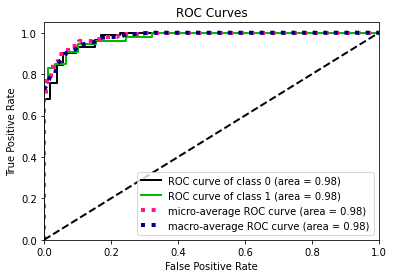

In [47]:
! pip install scikit-plot # https://pypi.org/project/scikit-plot/
import scikitplot as skplt 
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

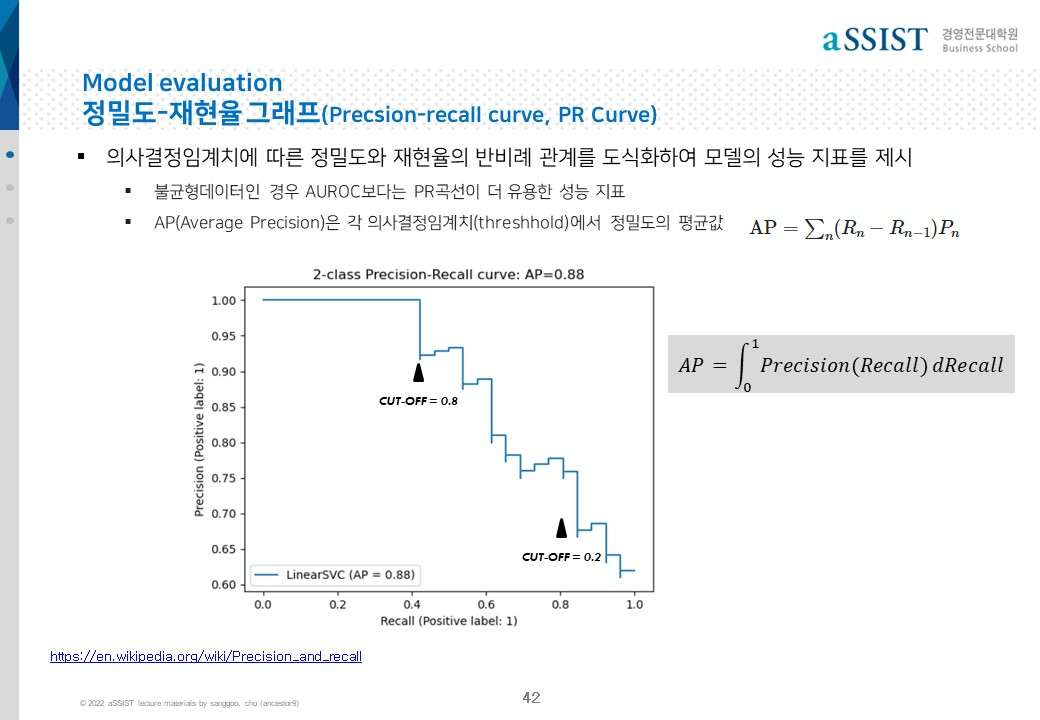

In [ ]:
Image(filename=dir_path + '/슬라이드42.jpg', width=width, height=height)

array([0.64634146, 0.64197531, 0.65      , 0.65822785, 0.66666667,
       0.67532468, 0.68421053, 0.69333333, 0.7027027 , 0.69863014,
       0.70833333, 0.71830986, 0.72857143, 0.73913043, 0.75      ,
       0.76119403, 0.77272727, 0.78461538, 0.78125   , 0.79365079,
       0.80645161, 0.81967213, 0.83333333, 0.84745763, 0.84482759,
       0.84210526, 0.85714286, 0.87272727, 0.88888889, 0.88679245,
       0.88461538, 0.88235294, 0.9       , 0.91836735, 0.9375    ,
       0.93617021, 0.95652174, 0.97777778, 0.97727273, 0.97674419,
       0.97619048, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

array([1.        , 0.98113208, 0.98113208, 0.98113208, 0.98113208,
       0.98113208, 0.98113208, 0.98113208, 0.98113208, 0.96226415,
       0.96226415, 0.96226415, 0.96226415, 0.96226415, 0.96226415,
       0.96226415, 0.96226415, 0.96226415, 0.94339623, 0.94339623,
       0.94339623, 0.94339623, 0.94339623, 0.94339623, 0.9245283 ,
       0.90566038, 0.90566038, 0.90566038, 0.90566038, 0.88679245,
       0.86792453, 0.8490566 , 0.8490566 , 0.8490566 , 0.8490566 ,
       0.83018868, 0.83018868, 0.83018868, 0.81132075, 0.79245283,
       0.77358491, 0.77358491, 0.75471698, 0.73584906, 0.71698113,
       0.69811321, 0.67924528, 0.66037736, 0.64150943, 0.62264151,
       0.60377358, 0.58490566, 0.56603774, 0.54716981, 0.52830189,
       0.50943396, 0.49056604, 0.47169811, 0.45283019, 0.43396226,
       0.41509434, 0.39622642, 0.37735849, 0.35849057, 0.33962264,
       0.32075472, 0.30188679, 0.28301887, 0.26415094, 0.24528302,
       0.22641509, 0.20754717, 0.18867925, 0.16981132, 0.15094

array([0.06412235, 0.07497776, 0.07522202, 0.0812456 , 0.08755007,
       0.08823165, 0.08946258, 0.08990145, 0.09568538, 0.10622661,
       0.11453127, 0.1283346 , 0.13642043, 0.14319382, 0.14758214,
       0.154741  , 0.17146235, 0.174262  , 0.18942907, 0.20701111,
       0.20860938, 0.20955255, 0.21505343, 0.23489924, 0.24229631,
       0.28067254, 0.33730226, 0.35585358, 0.39565185, 0.41376559,
       0.43924076, 0.44464995, 0.44911763, 0.45174657, 0.51802891,
       0.52812776, 0.54059378, 0.70706534, 0.73853513, 0.85011914,
       0.86831108, 0.90653478, 0.9207638 , 0.9452575 , 0.97211647,
       0.97667166, 0.98116876, 0.98668091, 0.98876619, 0.98904942,
       0.98992729, 0.99272546, 0.99301026, 0.99366087, 0.99408433,
       0.99446593, 0.99585901, 0.9959849 , 0.99678975, 0.99998239,
       0.99998494, 0.99998628, 0.99999463, 0.99999623, 0.99999673,
       0.99999732, 0.9999976 , 0.99999828, 0.99999829, 0.99999831,
       0.99999846, 0.99999856, 0.99999857, 0.99999862, 0.99999

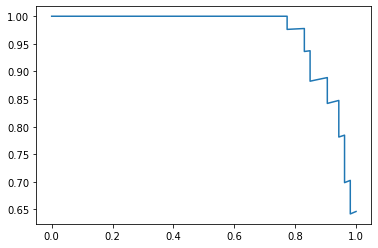

In [ ]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_proba[:, 1])
precisions
print('\n')
recalls
print('\n')
thresholds
print('\n')
plt.plot(recalls, precisions)

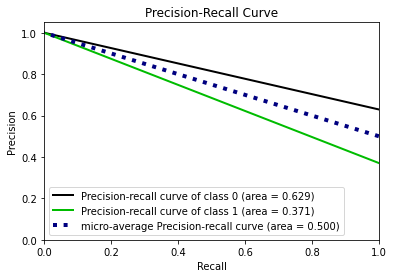

In [ ]:
skplt.metrics.plot_precision_recall(y_test, dummy_proba)

In [ ]:
y_train.sum()/len(y_train)

0.3732394366197183

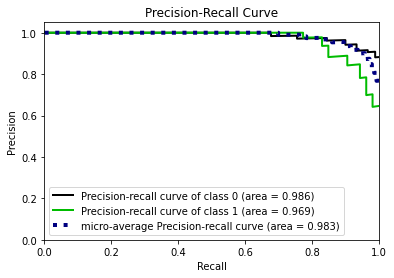

In [48]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [49]:
from sklearn.metrics import precision_recall_curve

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probas[:, 1])
scores = [np.sum(to_labels(y_probas[:, 1], t))/len(y_probas[:, 1]) for t in thresholds]

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


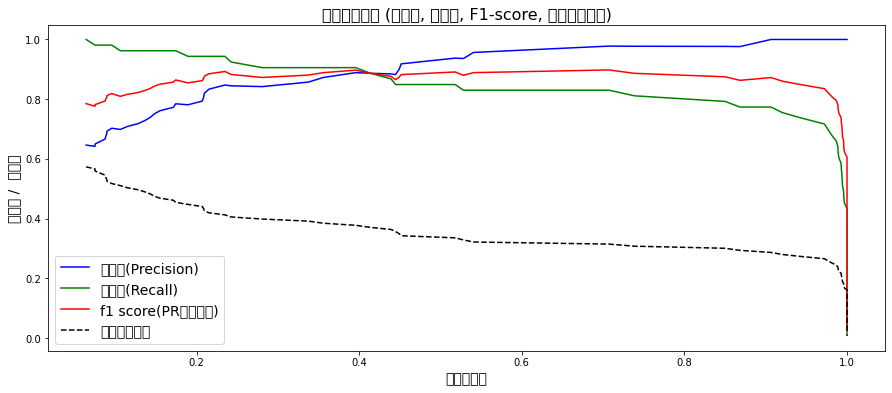

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## f1-score가 최대인 threshold?

In [51]:
from sklearn.metrics import f1_score
scores = [f1_score(y_test, to_labels(y_probas[:, 1], t)) for t in thresholds]
ix = np.argmax(scores)
print(f'Threshold(분류임계값)={thresholds[ix]:.3f}, at Maximum F-measure={scores[ix]:.3f}')

Threshold(분류임계값)=0.707, at Maximum F-measure=0.898


## Brier_score

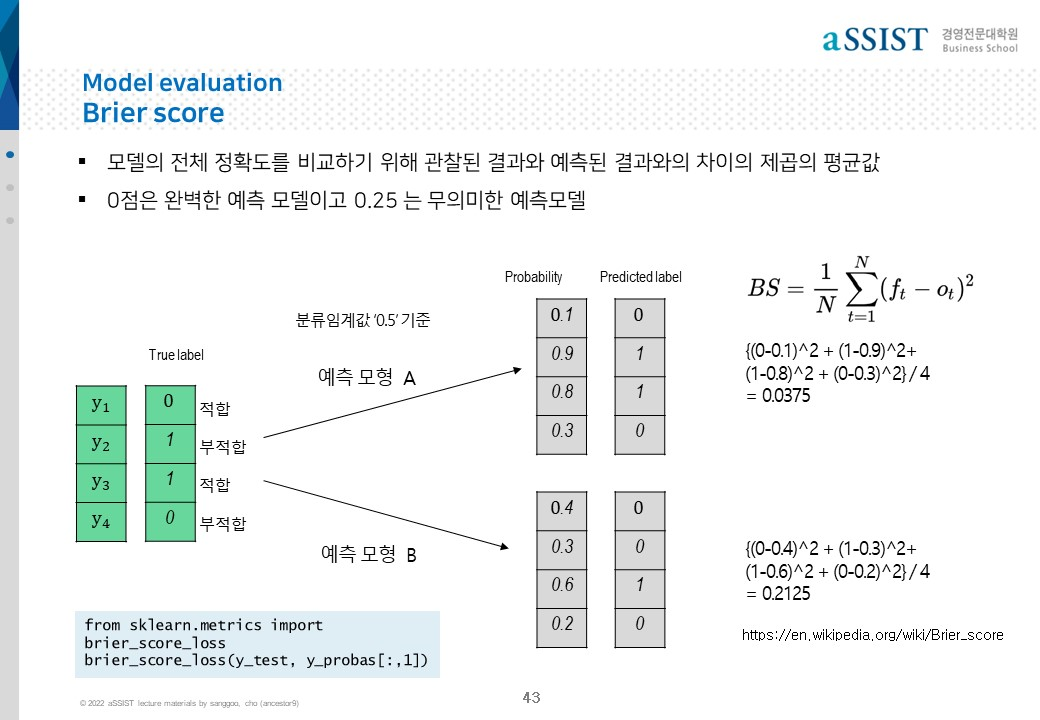

In [ ]:
Image(filename=dir_path + '/슬라이드43.jpg', width=width, height=height)

In [52]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_probas[:, 1])

0.05393556118435772

### plot_lift_curve / plot_cumulative_gain
- lift: the ratio between the results obtained with and without the predictive model
- cumulative_gain: percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases

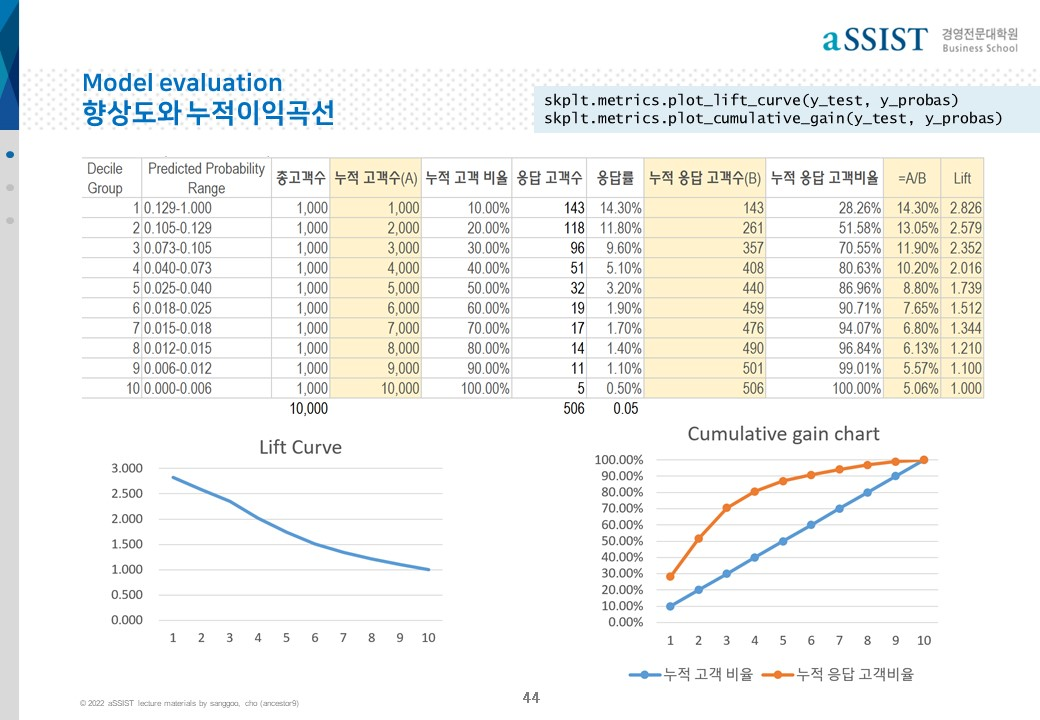

In [ ]:
Image(filename=dir_path + '/슬라이드44.jpg', width=width, height=height)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


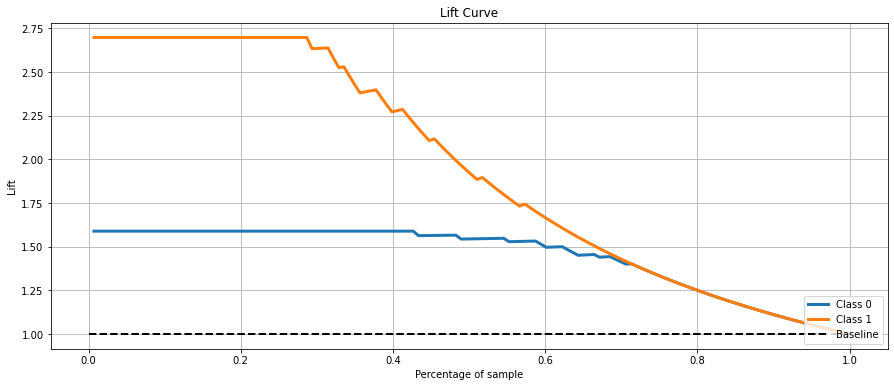

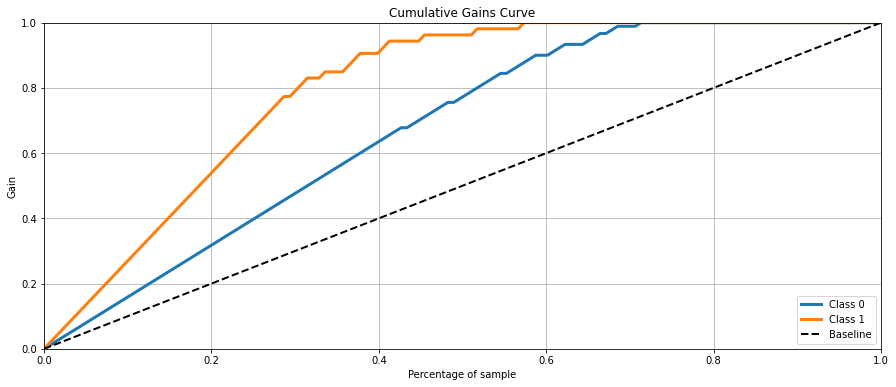

In [53]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

## 백분위수 (Decile) 분석

In [54]:
tf = pd.DataFrame({'actual_y' : y_test, 'probability_y' : y_probas[:, 1]}).sort_values('probability_y', ascending=False)
tf['decile'] = pd.qcut(tf["probability_y"], q = 10, labels = list(range(10, 0, -1)))
tf.head()

,actual_y,probability_y,decile
337,1,1.000000,1
33,1,1.000000,1
77,1,1.000000,1
42,1,0.999999,1
6,1,0.999999,1


In [55]:
tf = pd.DataFrame({'actual_y' : y_test, 'probability_y' : y_probas[:, 1]}).sort_values('probability_y', ascending=False)
tf['decile'] = pd.qcut(tf["probability_y"], q = 10, labels = list(range(10, 0, -1)))
tf.head()

,actual_y,probability_y,decile
337,1,1.000000,1
33,1,1.000000,1
77,1,1.000000,1
42,1,0.999999,1
6,1,0.999999,1


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Counts of real positive case within each decile')

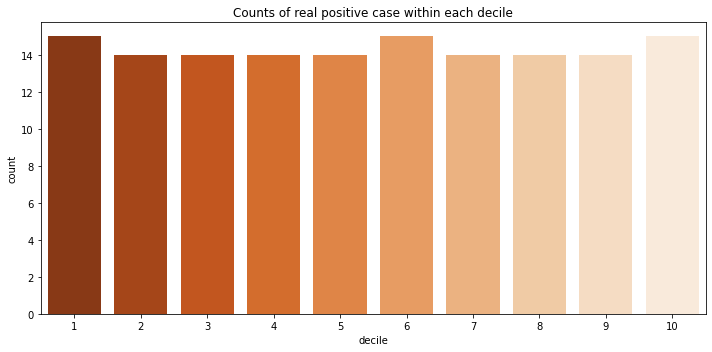

In [56]:
plt.figure(figsize = (10,5))
sns.countplot(x = "decile", data = tf, order = range(1, 11), palette = 'Oranges_r')
plt.title("Counts of real positive case within each decile")
plt.tight_layout()

In [57]:
data = tf[['actual_y', 'decile']].groupby("decile").sum().reset_index().sort_values('decile', ascending=False)
data

,decile,actual_y
9,1,15
8,2,14
7,3,13
6,4,6
5,5,3
4,6,2
3,7,0
2,8,0
1,9,0
0,10,0


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Profit brought by each product decile')

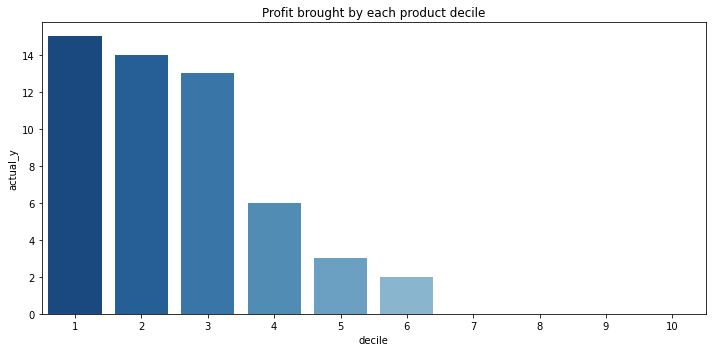

In [58]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'decile', y = 'actual_y', data = data, order = range(1, 11), palette = 'Blues_r')
plt.title("Profit brought by each product decile")
plt.tight_layout()

## Kolmogorov-Smirnov Test
- https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

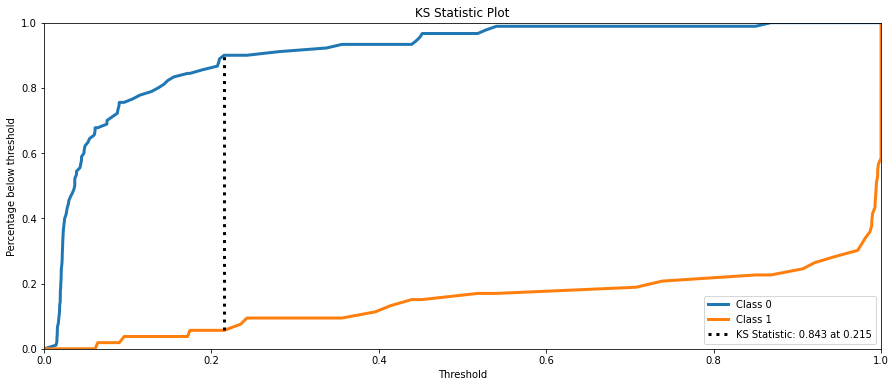

In [59]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [60]:
# 분포 생성
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 0.1, scale = 1, size = 500)
norm_c = np.random.normal(loc = 3, scale = 1, size = 500)
f_a = np.random.f(dfnum = 5, dfden  = 10, size = 500)

<Figure size 1080x360 with 0 Axes>

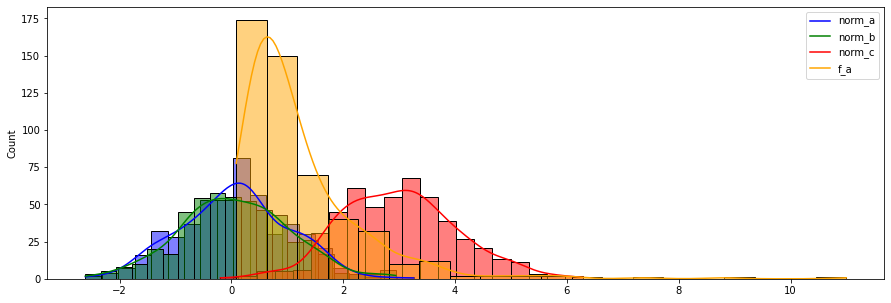

In [61]:
# 시각화
plt.figure(figsize = (15,5))
sns.histplot(norm_a, bins = 20, kde = True, color = 'b')
sns.histplot(norm_b, bins = 20, kde = True, color = 'g')
sns.histplot(norm_c, bins = 20, kde = True, color = 'r')
sns.histplot(f_a, bins = 20, kde = True, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [62]:
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x. 
    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.
    Returns:
        cdf = CDF_{sample}(x)
    '''
    # Sorts the sample, if needed
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

In [65]:
# CDF(Cumulative density function) 시각화
cdf_norm_a = np.array([cdf(norm_a, x, sort = True) for x in norm_a])
cdf_norm_b = np.array([cdf(norm_b, x, sort = True) for x in norm_b])
cdf_norm_c = np.array([cdf(norm_c, x, sort = True) for x in norm_c])
cdf_f_a = np.array([cdf(f_a, x, sort = True) for x in f_a])

<Figure size 1080x360 with 0 Axes>

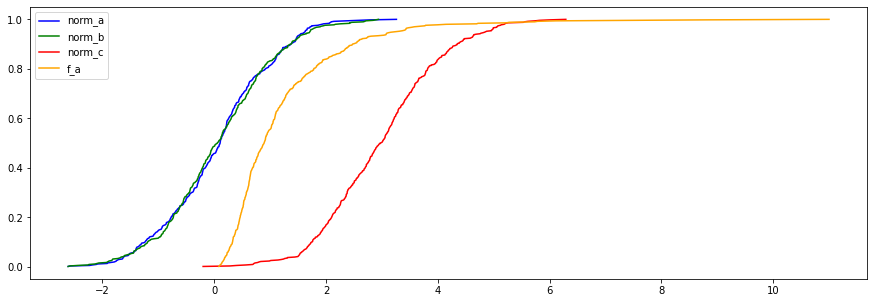

In [66]:
plt.figure(figsize = (15,5))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_b, y = cdf_norm_b, color = 'g')
sns.lineplot(x = norm_c, y = cdf_norm_c, color = 'r')
sns.lineplot(x = f_a, y = cdf_f_a, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

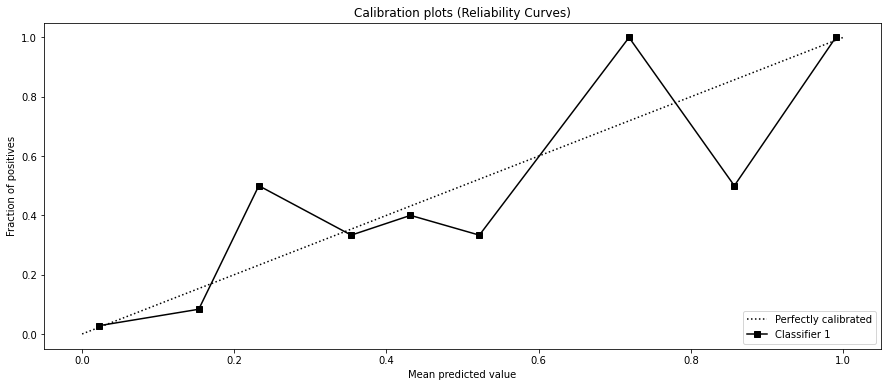

In [71]:
skplt.metrics.plot_calibration_curve(y_test, [y_probas])
#plot_ks_statistic(y_test, y_probas)

# End